In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

pd.set_option('display.max_columns', None)

nanny = pd.read_csv('dane_klasyfikacja.csv')

I'm checking what the average rate is for a nanny. Offers below the average will be classified as low-paid, while offers above it will be classified as well-paid

In [16]:
avg_salary = nanny.max_stawka.mean()
avg_salary.round(3)

29.525

In [17]:
median = nanny.max_stawka.median()
median

30.0

creating a new column that classifies the rate as low or high:

In [18]:
def salary_check(row):
    if row['max_stawka'] <= median:
            val = 0 #low salary
    else:
            val = 1 #high salary
        
    return val

creating new column to count low, high and median values:

In [19]:
def count_30(row):
    if row['max_stawka'] < median:
            val = 0 
    elif row['max_stawka'] == median:
            val = 30 
    else:
            val = 1 
        
    return val

In [20]:
nanny['klas'] = nanny.apply(salary_check, axis=1)

In [21]:
nanny['liczba_klas'] = nanny.apply(count_30, axis=1)

In [22]:
nanny['klas'].unique()

array([0, 1])

checking the distribution of data:

<AxesSubplot:xlabel='klas', ylabel='count'>

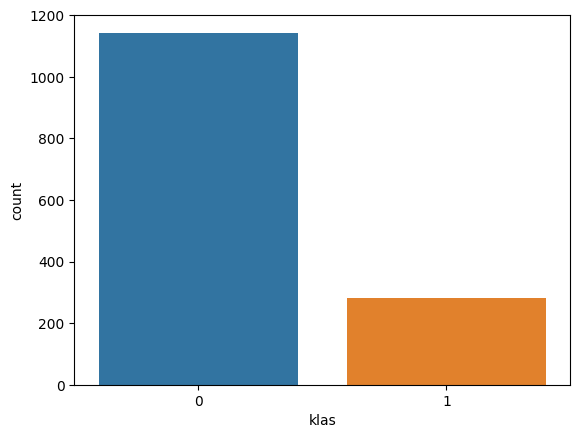

In [23]:
sns.countplot(x = 'klas', data = nanny, dodge = True)

<AxesSubplot:xlabel='liczba_klas', ylabel='count'>

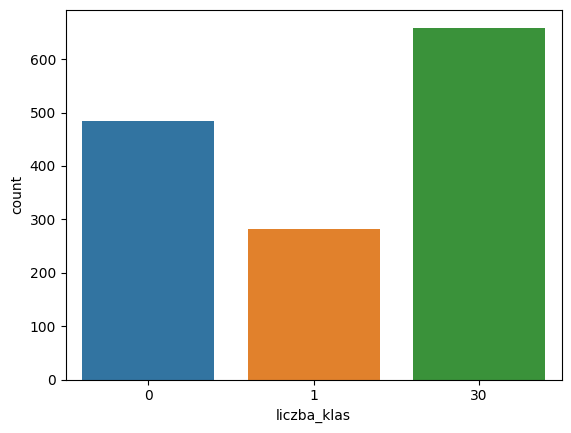

In [24]:
sns.countplot(x = 'liczba_klas', data = nanny, dodge = True)

<AxesSubplot:>

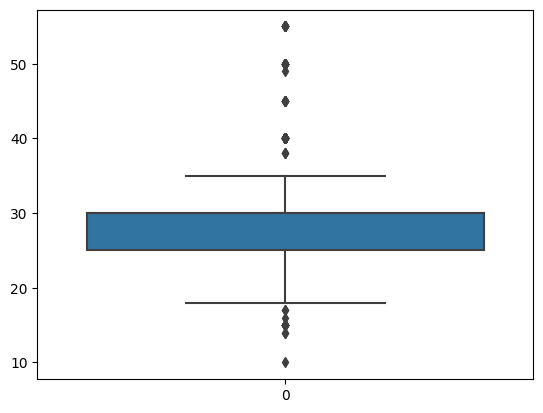

In [25]:
sns.boxplot(nanny['max_stawka'])

<AxesSubplot:xlabel='max_stawka', ylabel='Count'>

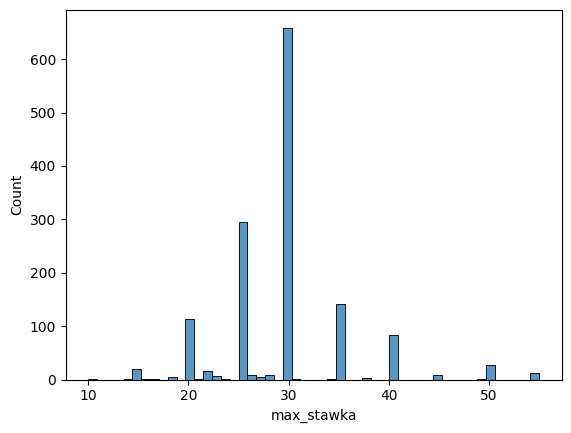

In [26]:
sns.histplot(data = nanny, x="max_stawka")

rounding down the average age of children:

In [27]:
for a in nanny['sredni_wiek_dzieci'].index:
    row = nanny['sredni_wiek_dzieci'][a]
    row = int(row)

I'm checking if classification is correct:

In [28]:
nanny[['max_stawka', 'klas']].sample(5)

,max_stawka,klas
947,30,0
145,25,0
746,30,0
469,30,0
147,25,0


preparing the dataset and determining features versus target:

In [30]:
random_state = 21

In [31]:
len(nanny)

1424

In [33]:
null_df = nanny.isnull()
all_null_rows = null_df.all(axis=1)

In [34]:
len(all_null_rows)

1424

In [35]:
nanny = nanny.drop(columns=['liczba_klas', 'Unnamed: 0', 'max_stawka', 'sredni_oczekiwany_wiek_n', 'autor', 'data_pobrania', 'data_zamieszczenia_ogloszenia'])

In [36]:
nanny = pd.get_dummies(nanny, columns = ['jezyk1', 'jezyk2', 'zrodlo_ogloszenia', 'miasto'])

In [37]:
nanny = nanny[nanny.notnull().all(axis=1)]

In [38]:
X = nanny.drop(columns=['klas'])
y = nanny['klas']

In [136]:
len(X.columns)

52

 splitting the dataset into a training set and a test set:

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state)
print(len(X), len(X_train), len(X_test), len(y_train), len(y_test))

1424 996 428 996 428


checking the results for individual algorithms without setting parameters:

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
import shap
from sklearn.feature_extraction.text import TfidfVectorizer 
plt.style.use('dark_background')

In [42]:
knn = KNeighborsClassifier()

In [43]:
logreg = LogisticRegression(random_state = random_state)

In [99]:
dtc = DecisionTreeClassifier()

In [45]:
rfc = RandomForestClassifier(random_state=random_state)

In [46]:
xgb = XGBClassifier(random_state=random_state)

In [47]:
def checking_algo(algorytm):
    
    algorytm.fit(X_train, y_train)
    y_pred = algorytm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    print(algorytm)
    print("Accuracy:", accuracy.round(3))
    print("Precision:", precision.round(3))
    print("Recall:", recall.round(3), '\n')

In [53]:
algo_list = [knn, logreg, dtc, rfc, xgb]

In [54]:
for a in algo_list:
    checking_algo(a)

KNeighborsClassifier()
Accuracy: 0.804
Precision: 0.653
Recall: 0.558 

LogisticRegression(random_state=21)
Accuracy: 0.799
Precision: 0.636
Recall: 0.555 

DecisionTreeClassifier()
Accuracy: 0.734
Precision: 0.583
Recall: 0.588 



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomForestClassifier(random_state=21)
Accuracy: 0.813
Precision: 0.698
Recall: 0.559 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=21,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy: 0.811
Precision: 0.686
Recall: 0.631 



CROSS-VALIDATION

In [55]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

In [56]:
def cross_val(alg, X, y):
        scores = cross_val_score(alg, X, y, cv=5)
        cv_preds = cross_val_predict(alg, X, y, cv=5)
    
        print(alg)
        print("Accuracy:", accuracy_score(y, cv_preds))
        print("Precision:", precision_score(y, cv_preds))
        print("Recall:", recall_score(y, cv_preds), '\n')

 checking which model performs the best without hpt:

In [57]:
for a in algo_list:
    cross_val(a, X, y)

KNeighborsClassifier()
Accuracy: 0.7872191011235955
Precision: 0.36904761904761907
Recall: 0.1103202846975089 



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

LogisticRegression(random_state=21)
Accuracy: 0.7872191011235955
Precision: 0.4153846153846154
Recall: 0.19217081850533807 

DecisionTreeClassifier()
Accuracy: 0.6917134831460674
Precision: 0.30637254901960786
Recall: 0.44483985765124556 

RandomForestClassifier(random_state=21)
Accuracy: 0.8258426966292135
Precision: 0.6513761467889908
Recall: 0.2526690391459075 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='au

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [83]:
feature_names = X.columns

creating dictionary for the results:

In [84]:
results = {'model':[], 'precision_train':[], 'precision_test':[], 'recall_train':[], 'recall_test':[], 'f1_train':[], 'f1_test':[], 'auc_train':[], 'auc_test':[] }

adding corresponding parameters for particular models:

In [85]:
max_depth = list(range(1,10))
n_estimators = list(range(25,250,25))

params_xgb = dict(max_depth=max_depth, n_estimators=n_estimators)

In [86]:
criterion = ['gini', 'entropy']
max_depth = list(range(1,20))
min_samples_split = list(range(1,20))
min_samples_leaf= list(range(1,20))

params_dtc = dict(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf = min_samples_leaf)

In [87]:
n_estimators = list(range(40,300,10))
max_depth = list(range(1,20))
min_samples_split = list(range(1,20))
min_samples_leaf = list(range(1,20))

params_rfc = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

Function with HPT (Hyperparameter Tuning) to select the best parameters for the model:

In [88]:
def best_model(params, model):
    
    hpt = RandomizedSearchCV(model, params, cv=3)
    search = hpt.fit(X_train, y_train)
    print("Best hyperparameters: ", hpt.best_params_)
    model_final = search.best_estimator_
    
    y_test_pred = model_final.predict(X_test)
    y_train_pred = model_final.predict(X_train)
    
    y_test_pred_proba = model_final.predict_proba(X_test) 
    y_train_pred_proba = model_final.predict_proba(X_train)
    
    return {'model': model_final, 'y_test_pred':y_test_pred, 'y_train_pred':y_train_pred,
            'y_test_pred_proba':y_test_pred_proba, 'y_train_pred_proba':y_train_pred_proba}

Function to check metrics:

In [89]:
def tree_models_scores(model_dec_tree, nazwa):
    model = model_dec_tree['model']
    y_test_pred = model_dec_tree['y_test_pred']
    y_train_pred = model_dec_tree['y_train_pred']
    y_test_pred_proba = model_dec_tree['y_test_pred_proba']
    y_train_pred_proba = model_dec_tree['y_train_pred_proba']
    feature_importances = model.feature_importances_
    
    indices = feature_importances.argsort()[::-1][:5]
    sorted_feature_importances = feature_importances[indices]
    sorted_feature_names = [feature_names[i] for i in indices]
        
    precision_train = precision_score(y_train, y_train_pred, average='macro')
    precision_test = precision_score(y_test, y_test_pred, average='macro')
    recall_train = recall_score(y_train, y_train_pred, average='macro')
    recall_test = recall_score(y_test, y_test_pred, average='macro')
    f1_train = f1_score(y_train, y_train_pred, average = 'binary')
    f1_test = f1_score(y_test, y_test_pred, average = 'binary')
        
    results['model'].append(nazwa)
    results['precision_train'].append(precision_train.round(3))
    results['precision_test'].append(precision_test.round(3))
    results['recall_train'].append(recall_train.round(3))
    results['recall_test'].append(recall_test.round(3))
    results['f1_train'].append(f1_train.round(3))
    results['f1_test'].append(f1_test.round(3))
    
    wynik = {'feature_importances': feature_importances}
    return wynik

function counting auc:

In [90]:
def auc(y, y_pred_proba):    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])
    auc = metrics.roc_auc_score(y, y_pred_proba[:,1])
    return {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds, 'auc': auc}

function showing ROC graph:

In [91]:
def roc_graph(fpr_train, tpr_train, auc_train, fpr_test, tpr_test, auc_test):
    plt.figure(figsize=(8, 5))
    results['auc_test'].append(auc_test.round(3))
    results['auc_train'].append(auc_train.round(3))
    plt.plot(fpr_train, tpr_train, label="AUC train="+str(auc_train.round(3)))
    plt.plot(fpr_test, tpr_test, label="AUC test="+str(auc_test.round(3)))
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    plt.show()

Function checking probability distribution:

In [92]:
def probabilitity_dist(y_train_pred_proba, y_test_pred_proba):
    plt.figure(figsize=(8, 5))
    plt.hist(y_train_pred_proba[:,1], label="Train probability")
    plt.hist(y_test_pred_proba[:,1], label="Test probability")
    plt.title('Probability Distribution')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.legend(loc=0)

Function with precision-recall graph:

In [93]:
def precision_recall(y_train_pred_proba, y_test_pred_proba):
    plt.figure(figsize=(8, 5))
    precision, recall, thresholds_train_pr = precision_recall_curve(y_train,y_train_pred_proba[:,1])
    precision_t, recall_t, thresholds_test_pr = precision_recall_curve(y_test,y_test_pred_proba[:,1])
    plt.plot(recall, precision, label='Train Precision-Recall Curve')
    plt.plot(recall_t, precision_t, label='Test Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc=2)

Function checking most important coefficients:

In [94]:
def feature_importances(features):
    
    plt.figure(figsize=(8, 5))
    indices = np.argsort(features)[::-1][:5]
    sorted_feature_importances = features[indices]
    sorted_feature_names = [feature_names[i] for i in indices]
    plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
    plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')

Function with shap graph:

In [95]:
def szap(algo):
    plt.figure(figsize=(10, 8))
    vectorizer = TfidfVectorizer()
    explainer = shap.Explainer(algo, X_test, feature_names=X.columns)
    shap_values = explainer(X_test)
    shap.plots.beeswarm(shap_values[:,:,1])

Function combining all the previous functions:

In [101]:
def all_tree(model, params, nazwa):
    
    model_dec_tree = best_model(params, model)
    model = model_dec_tree['model']
    y_test_pred = model_dec_tree['y_test_pred']
    y_train_pred = model_dec_tree['y_train_pred']
    y_test_pred_proba = model_dec_tree['y_test_pred_proba']
    y_train_pred_proba = model_dec_tree['y_train_pred_proba']
    
    drzewo_dec = tree_models_scores(model_dec_tree, nazwa)
    features_tree = drzewo_dec['feature_importances']
    
    auc_tree_train = auc(y_train, y_train_pred_proba)
    fpr_t_train = auc_tree_train['fpr']
    tpr_t_train = auc_tree_train['tpr']
    thresholds_t_train = auc_tree_train['thresholds']
    auc_t_train = auc_tree_train['auc']
    
    auc_tree_test = auc(y_test, y_test_pred_proba)
    fpr_t_test = auc_tree_test['fpr']
    tpr_t_test = auc_tree_test['tpr']
    thresholds_t_test = auc_tree_test['thresholds']
    auc_t_test = auc_tree_test['auc']
    
    roc_graph(fpr_t_train, tpr_t_train, auc_t_train, fpr_t_test, tpr_t_test, auc_t_test)
    probabilitity_dist(y_train_pred_proba, y_test_pred_proba)
    precision_recall(y_train_pred_proba, y_test_pred_proba)
    feature_importances(features_tree)
    szap(model)

In [102]:
algo_trees_list = [dtc, rfc, xgb]
param_trees_list = [params_dtc, params_rfc, params_xgb]
names = ['dec_tree', 'random_f', 'xgb_tree']

checking ROC curve, probability distribution, Precision-Recall curve, feature importances and shap graph for all tree models:

dec_tree
Best hyperparameters:  {'min_samples_split': 16, 'min_samples_leaf': 19, 'max_depth': 3, 'criterion': 'entropy'}



3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marcin/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marcin/.local/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/home/marcin/.local/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

One or more of the test scores are non-fini

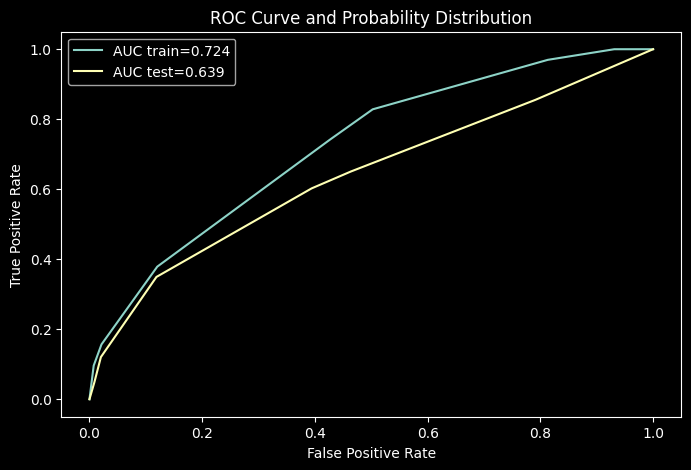

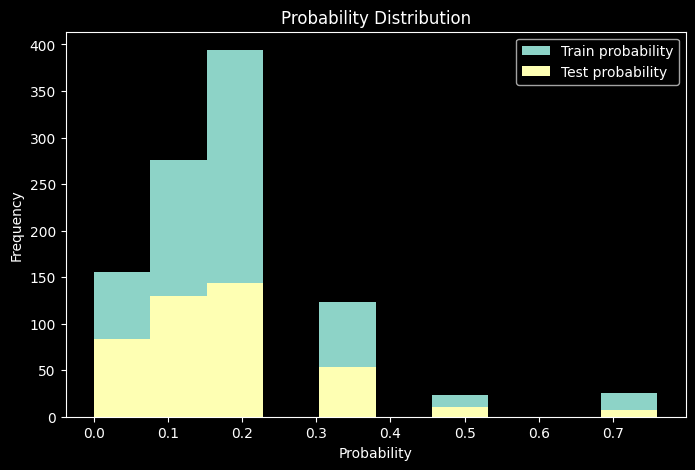

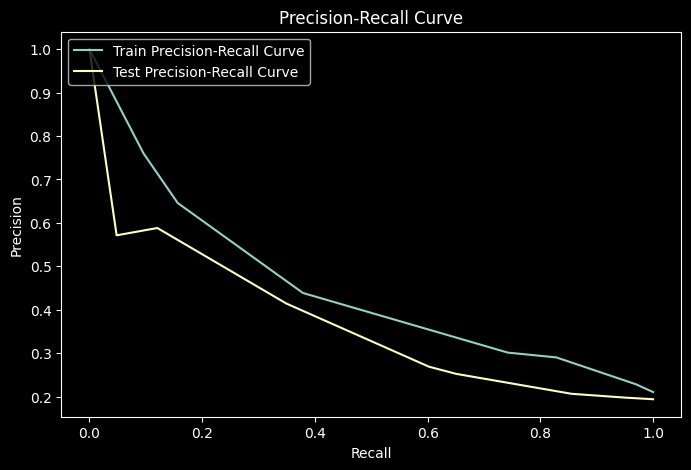

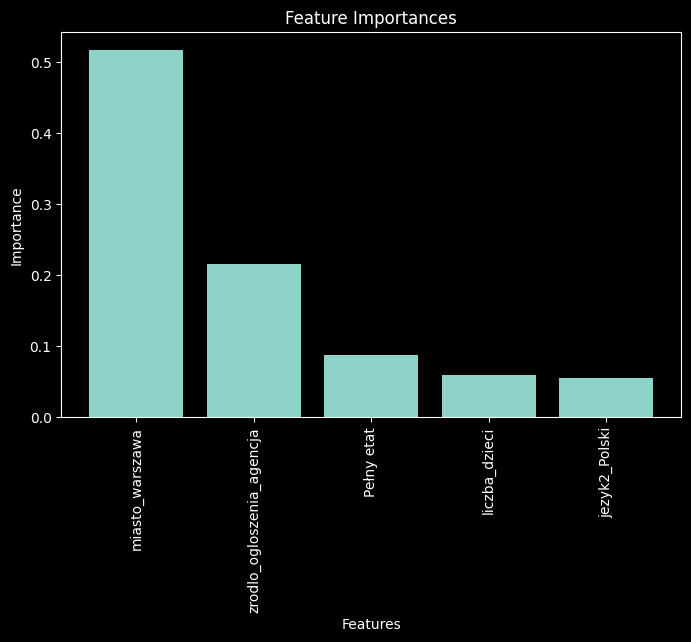

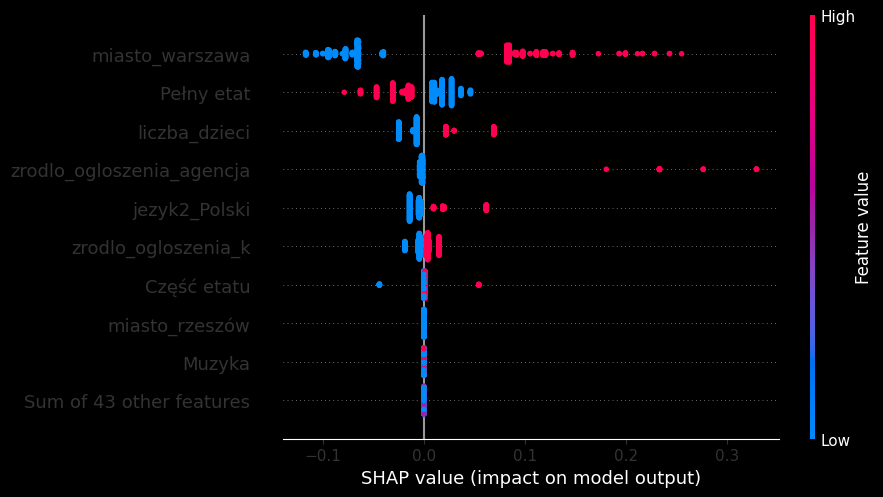

random_f
Best hyperparameters:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 18}


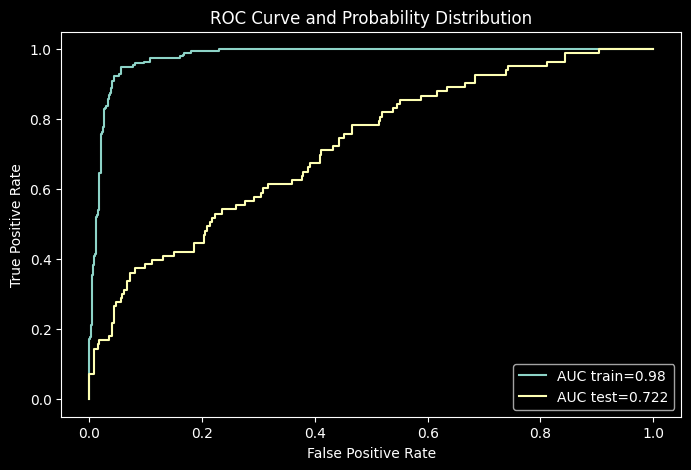

 93%|=================== | 797/856 [00:12<00:00]       

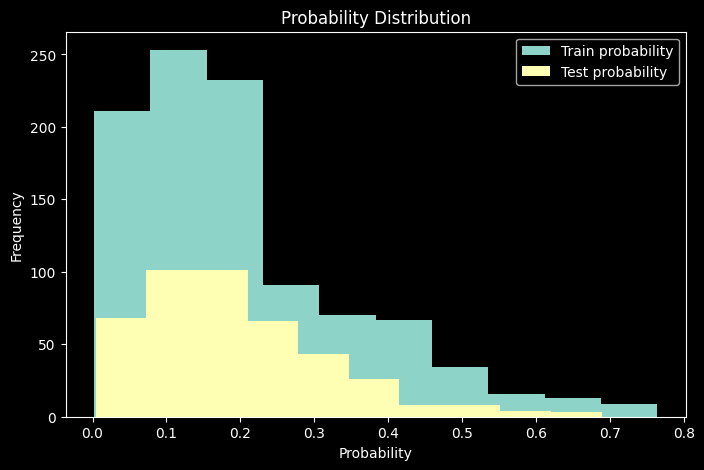

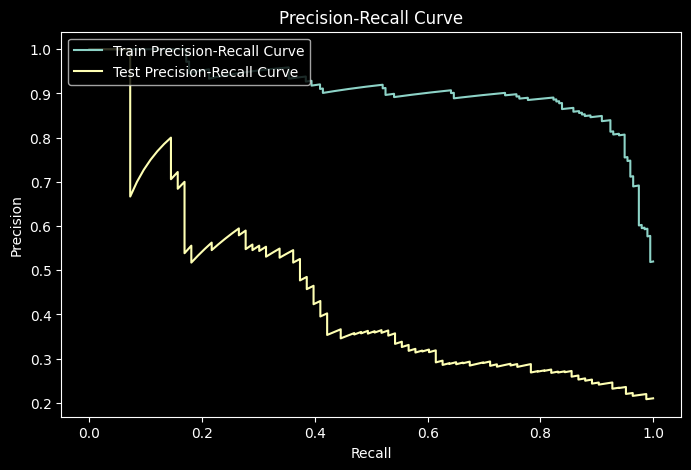

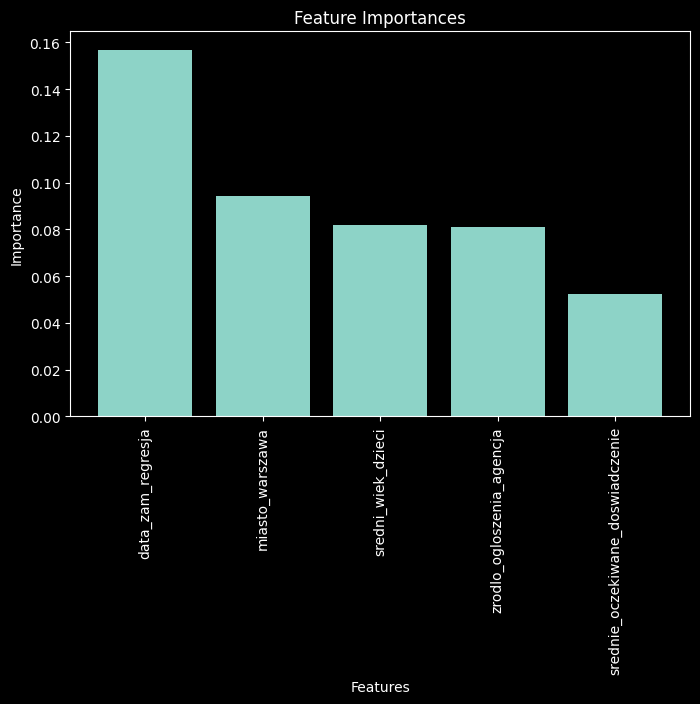

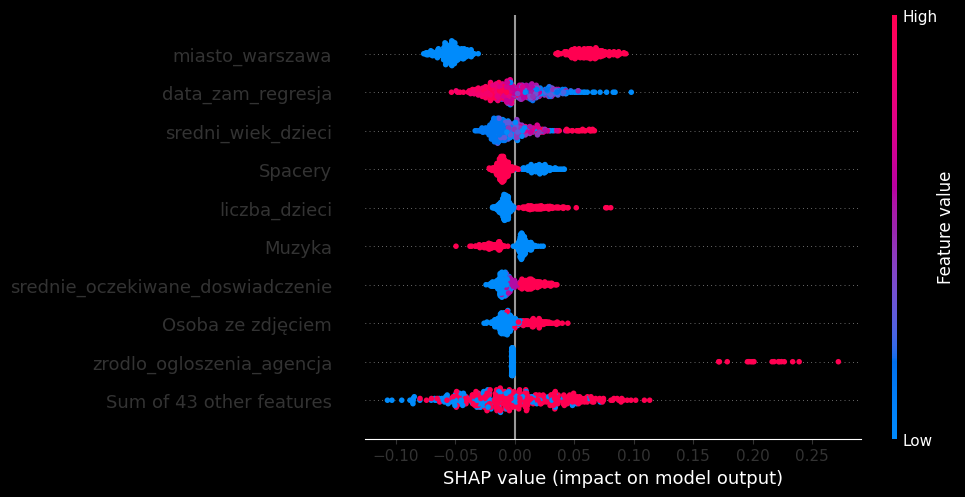

xgb_tree
Best hyperparameters:  {'n_estimators': 100, 'max_depth': 1}


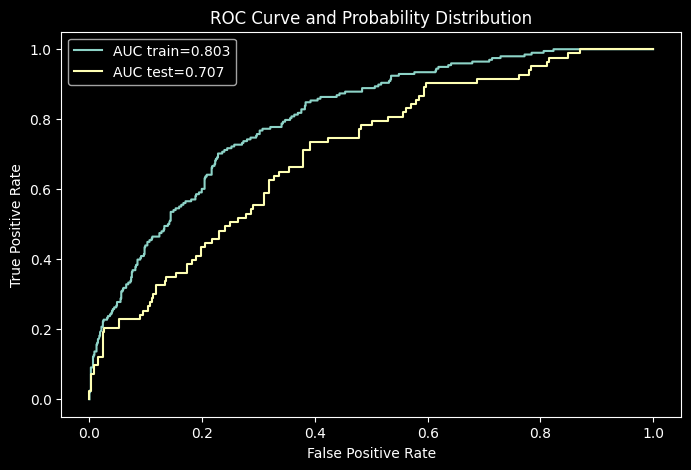

IndexError: too many indices for array

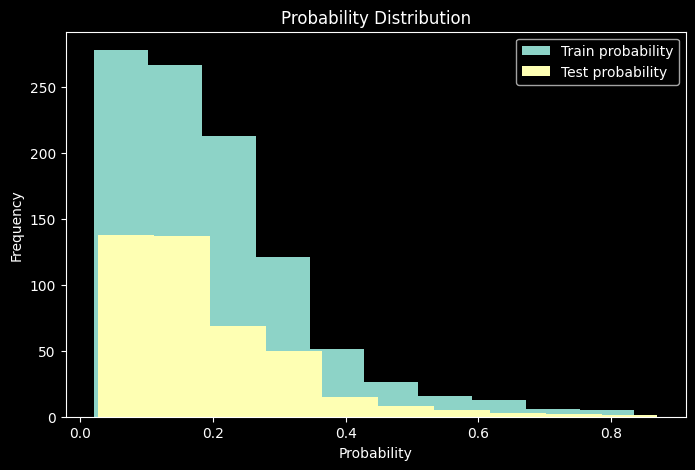

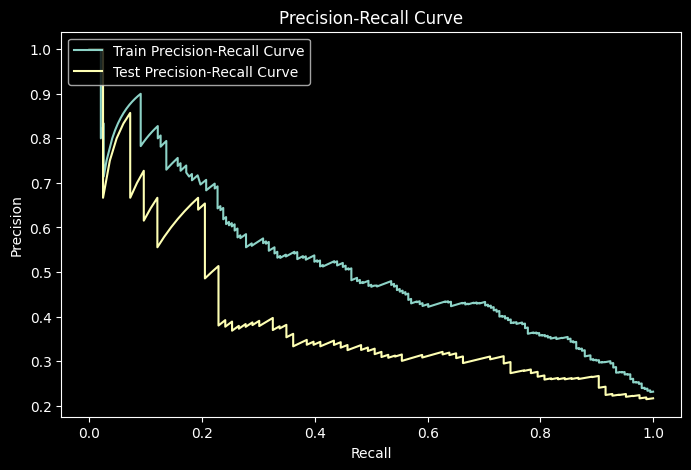

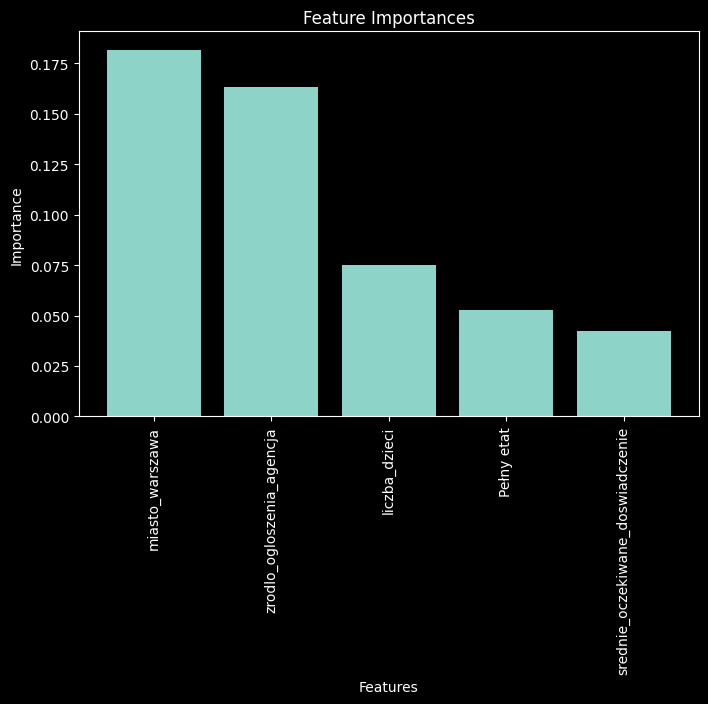

<Figure size 1000x800 with 0 Axes>

In [103]:
for element in range(len(algo_trees_list)):
    print(names[element])
    all_tree(algo_trees_list[element], param_trees_list[element], names[element])


checking results:

In [104]:
res = pd.DataFrame(results)
res.sort_values('f1_test', ascending = False)

,model,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test,auc_train,auc_test
1,dec_tree,0.726,0.619,0.627,0.582,0.404,0.311,0.824,0.645
3,random_f,0.890,0.797,0.617,0.556,0.379,0.208,0.980,0.722
0,dec_tree,0.735,0.705,0.568,0.550,0.252,0.200,0.726,0.650
2,dec_tree,0.735,0.705,0.568,0.550,0.252,0.200,0.724,0.639
4,xgb_tree,0.787,0.732,0.569,0.547,0.252,0.186,0.803,0.707


neural network model:

In [114]:
import keras
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler

In [143]:
X = nanny.drop(columns=['klas'])
y = nanny['klas']

In [145]:
X = X.iloc[:, :24]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state)
print(len(X), len(X_train), len(X_test), len(y_train), len(y_test))

1424 996 428 996 428


In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
model_nn = tf.keras.Sequential()

In [171]:
model_nn.add(tf.keras.layers.Dense(256, input_shape = (24,),activity_regularizer=regularizers.l1(10e-5)))
model_nn.add(tf.keras.layers.PReLU(input_shape=(24,))) # z tego co kojarzę akurat funkcja aktywacji PReLU musi być osobno, normalnie możesz wrzucać funkcję aktywacji do linijki wyżej
model_nn.add(tf.keras.layers.Dropout(rate=0.5))
model_nn.add(tf.keras.layers.Dense(16, activity_regularizer=regularizers.l1(10e-55)))
model_nn.add(tf.keras.layers.PReLU(input_shape=(28,)))
model_nn.add(tf.keras.layers.Dense(1, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5)))
model_nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               6400      
                                                                 
 p_re_lu_8 (PReLU)           (None, 256)               256       
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 16)                4112      
                                                                 
 p_re_lu_9 (PReLU)           (None, 16)                16        
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
 dense_15 (Dense)            (None, 256)              

In [176]:
model_nn.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy())
model_nn.fit(X_train, y_train, batch_size=128, epochs=20)
model_nn.fit(X_train, y_train, batch_size=200, epochs=50)

Epoch 1/20
8/8 [==============================] - 2s 6ms/step - loss: 0.1621
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1582
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1901
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1498
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1457
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1316
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1333
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1400
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1491
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1610
Epoch 11/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1528
Epoch 12/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1454
Epoch 13/20
8/8 [==============================] - 0s 6ms/step - loss: 0.

In [177]:
y_pred = model_nn.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the probabilities for each class
y_pred_prob = model_nn.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate and print additional evaluation metrics
print("Accuracy test:", accuracy_score(y_test, y_pred).round(3))
print("Precision test:", precision_score(y_test, y_pred).round(3))
print("Recall test:", recall_score(y_test, y_pred).round(3))
print("F1-Score test:", f1_score(y_test, y_pred).round(3))
print("Confusion Matrix test:")
print(confusion_matrix(y_test, y_pred))
# Accuracy test: 0.771
# Precision test: 0.273
# Recall test: 0.108
# F1-Score test: 0.155

14/14 [==============================] - 0s 2ms/step
Accuracy test: 0.787
Precision test: 0.4
Recall test: 0.193
F1-Score test: 0.26
Confusion Matrix test:
[[321  24]
 [ 67  16]]


In [170]:
# Predict the probabilities for each class
y_pred_prob_train = model_nn.predict(X_train)

# Convert probabilities to class labels
y_pred = (y_pred_prob_train > 0.5).astype(int)

# Calculate and print additional evaluation metrics
print("Accuracy train:", accuracy_score(y_train, y_pred).round(3))
print("Precision train:", precision_score(y_train, y_pred).round(3))
print("Recall train:", recall_score(y_train, y_pred).round(3))
print("F1-Score train:", f1_score(y_train, y_pred).round(3))
print("Confusion Matrix train:")
print(confusion_matrix(y_train, y_pred))

32/32 [==============================] - 0s 1ms/step
Accuracy train: 0.903
Precision train: 0.981
Recall train: 0.52
F1-Score train: 0.68
Confusion Matrix train:
[[796   2]
 [ 95 103]]


In [649]:
model_siec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

In [651]:
model_siec.fit(X_train, y_train)

32/32 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.6305 - precision: 0.2148 - recall: 0.3232


In [164]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    